# Midterm 3 - Assignment 2

## Import all the necessary modules


In [1]:
from keras.datasets import cifar10
import keras
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

## Load and normalize the dataset

In [2]:
(tr_set, tr_labels), (ts_set, ts_labels) = cifar10.load_data()
tr_set = tr_set.astype("float32") / 255
ts_set = ts_set.astype("float32") / 255
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
tr_labels_one_hot = keras.utils.to_categorical(tr_labels)
ts_labels_one_hot = keras.utils.to_categorical(ts_labels)

## Build the model

In [3]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, 3, padding="same", activation="relu", input_shape=[32, 32, 3]))
model.add(keras.layers.Conv2D(32, 3, padding="same", activation="relu"))
model.add(keras.layers.MaxPool2D(2, 2, padding="same"))
model.add(keras.layers.Conv2D(32, 3, padding="same", activation="relu"))
model.add(keras.layers.Conv2D(32, 3, padding="same", activation="relu"))
model.add(keras.layers.MaxPool2D(2, 2, padding="same"))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(256, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

## Train the model

In [4]:
model.fit(tr_set, tr_labels_one_hot, validation_data=(ts_set, ts_labels_one_hot), epochs=20)

Epoch 1/20
1563/1563 [==============================] - 12s 6ms/step - loss: 1.6850 - accuracy: 0.3833 - val_loss: 1.0950 - val_accuracy: 0.6145
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0831 - accuracy: 0.6142 - val_loss: 0.9566 - val_accuracy: 0.6613
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9353 - accuracy: 0.6704 - val_loss: 0.8736 - val_accuracy: 0.6926
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8349 - accuracy: 0.7054 - val_loss: 0.7785 - val_accuracy: 0.7291
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7504 - accuracy: 0.7334 - val_loss: 0.7643 - val_accuracy: 0.7300
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6975 - accuracy: 0.7546 - val_loss: 0.7239 - val_accuracy: 0.7475
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6512 - accuracy: 0.7669 - val_loss: 0.7438 - val_accuracy

## Accuracy on test test

In [5]:
classes_tr = np.argmax(model.predict(tr_set), axis=1)
values = model.evaluate(tr_set, tr_labels_one_hot, verbose=0)
print("Training Error: {0}, Training accuracy: {1}".format(values[0], values[1]))

Training Error: 0.17901770770549774, Training accuracy: 0.9541400074958801


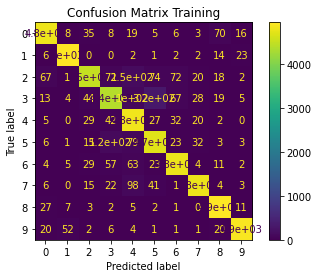

In [6]:
confusion_matrix_tr = confusion_matrix(tr_labels, classes_tr)
ConfusionMatrixDisplay(confusion_matrix_tr, np.arange(10)).plot()
plt.title("Confusion Matrix Training")
plt.show()

## Accuracy on test set

In [7]:
classes_ts = np.argmax(model.predict(ts_set), axis=1)
values = model.evaluate(ts_set, ts_labels_one_hot, verbose=0)
print("Test Error: {0}, Test accuracy: {1}".format(values[0], values[1]))

Test Error: 0.6944543123245239, Test accuracy: 0.7720000147819519


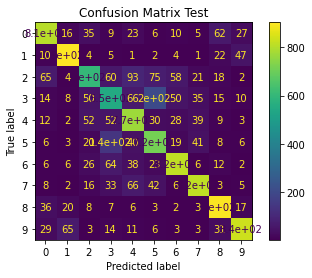

In [8]:
confusion_matrix_ts = confusion_matrix(ts_labels, classes_ts)
ConfusionMatrixDisplay(confusion_matrix_ts, np.arange(10)).plot()
plt.title("Confusion Matrix Test")
plt.show()